# Homework 2: Linear Regression

The is the coding potion of Homework 2. The homework is aimed at testing the ability to deal with a real-world dataset and use linear regression on it.

In [70]:
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load Dataset
Loading the California Housing dataset using sklearn.

In [71]:
# Load dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Part 1 : Analyse the dataset

In [72]:
# Put the dataset along with the target variable in a pandas dataframe
data = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add target to data
data['target'] = housing['target']
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 1a : Check for missing values in the dataset

The dataset might have missing values represented by a `NaN`. Check if the dataset has such missing values.

In [73]:
# Check for missing values
def is_null(dataframe):
    """
    This function takes as input a pandas dataframe and outputs whether the
    dataframe has missing values. Missing values can be detected by checking
    for the presence of None or NaN. inf or -inf must also be treated as a missing value.

    Input:
        dataframe: Pandas dataframe
    Output:
        Return True is there are missing value in the dataframe. If not, return False.
    """
    
    
    
    #too lazy, go over all the values and check if == nan or none or -inf or inf
    return dataframe.isnull().values.any()


     # YOUR CODE HERE
    #first we check for the inf values mentioned in the problem 
    if (dataframe.isin([float('inf')]).any().any() or dataframe.isin([float('-inf')]).any().any()):
        return True
    elif dataframe.isnull().any():
        return True
    return False

In [74]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# This dataset has no null values; you can run this cell as a sanity check.
print(f"The data has{'' if is_null(data) else ' no'} missing values.")
assert not is_null(data)

The data has no missing values.


### Part 1b: Studying the distribution of the target variable

Plot the histogram of the target variable over a fixed number of bins (say, 30).

Example histogram output:

![Target histogram](https://jeffcui.com/misc/target_histogram.png)

Hint: Use the histogram plotting function available in Seaborn in Matplotlib.

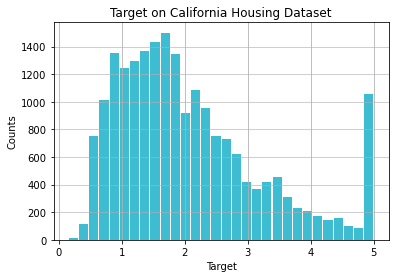

In [75]:
# Plot histogram of target variable

data['target'].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#3EBCD2')

plt.title('Target on California Housing Dataset')
plt.xlabel('Target')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

# YOUR CODE HERE

### Part 1c: Plotting the correlation matrix
Given the dataset stored in the `data` variable, plot the correlation matrix for the dataset. The dataset has 9 variables (8 features and one target variable) and thus, the correlation matrix must have a size of `9x9`.

Hint: You may use the correlation matrix computation of a dataset provided by the `pandas` library.

Link: [What is a correlation matrix?](https://www.displayr.com/what-is-a-correlation-matrix/)

<AxesSubplot:>

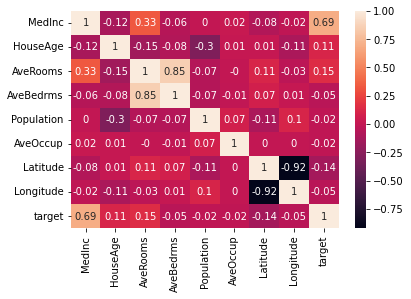

In [76]:
# Correlation matrix
def get_correlation_matrix(dataframe):
    """
    Given a pandas dataframe, obtain the correlation matrix
    computing the correlation between the entities in the dataset.

    Input:
        dataframe: Pandas dataframe
    Output:
        Return the correlation matrix as a pandas dataframe, rounded off to 2 decimal places.
    """
    #use the corr function to get the matrix
    corr = dataframe.corr()
    
    # YOUR CODE HERE
    return corr.round(2)

# Plot the correlation matrix
correlation_matrix = get_correlation_matrix(data)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [77]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# You can check your output against the expected correlation matrix below:
ground_truth = np.array([
    [1.0, -0.12, 0.33, -0.06, 0.0, 0.02, -0.08, -0.02, 0.69],
    [-0.12, 1.0, -0.15, -0.08, -0.3, 0.01, 0.01, -0.11, 0.11],
    [0.33, -0.15, 1.0, 0.85, -0.07, 0.0, 0.11, -0.03, 0.15],
    [-0.06, -0.08, 0.85, 1.0, -0.07, -0.01, 0.07, 0.01, -0.05],
    [0.0, -0.3, -0.07, -0.07, 1.0, 0.07, -0.11, 0.1, -0.02],
    [0.02, 0.01, 0.0, -0.01, 0.07, 1.0, 0.0, 0.0, -0.02],
    [-0.08, 0.01, 0.11, 0.07, -0.11, 0.0, 1.0, -0.92, -0.14],
    [-0.02, -0.11, -0.03, 0.01, 0.1, 0.0, -0.92, 1.0, -0.05],
    [0.69, 0.11, 0.15, -0.05, -0.02, -0.02, -0.14, -0.05, 1.0],
])
assert np.allclose(ground_truth, get_correlation_matrix(data).to_numpy(), rtol=1e-2, atol=1e-2)

### Part 1d: Extracting relevant variables

Based on the correlation matrix obtained in the previous part, identify the top-4 most relevant features from the dataset for predicting the target variable.

That will be MedInc(0.69), HouseAge(0.11), AveRooms(0.15), and Latitude(-0.14)

## Part 2: Data Manipulation

This section is focused on arranging the dataset in a format suitable for training the linear regression model.

### Part 2a: Normalize the dataset

Find the mean and standard deviation corresponding to each feature and target variable in the dataset. Use the values of the mean and standard deviation to normalize the dataset.

In [78]:
features = np.concatenate([data[name].to_numpy()[:, None] for name in housing['feature_names']], axis=1)
target = housing['target']

# Normalize data
def normalize(features, target):
    #Normalize them separatly 
    
    features_normalized = (features - features.mean(axis=0))/features.std(axis=0)
    
    target_normalized = (target - target.mean(axis=0))/target.std(axis=0)
    
    return features_normalized, target_normalized

features_normalized, target_normalized = normalize(features, target)

In [79]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.
assert all(np.abs(features_normalized.mean(axis=0)) < 1e-2), "Mean should be close to 0"
assert all(np.abs(features_normalized.std(axis=0) - 1) < 1e-2), "Standard deviation should be close to 1"
assert np.abs(target_normalized.mean(axis=0)) < 1e-2, "Mean should be close to 0"
assert np.abs(target_normalized.std(axis=0) - 1) < 1e-2, "Standard deviation should be close to 1"

### Part 2b: Train-Test Split

Use the train-test split function from `sklearn` and execute a 80-20 train-test split of the dataset.

In [80]:
# YOUR CODE HERE

from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1) #drop the target column for the X

Y = data['target'] #just need the target column for Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) #test size 0.2 is for the 80-20 split 

In [81]:
# === DO NOT MOVE/DELETE ===
# This cell is used as a placeholder for autograder script injection.

# Sanity checking:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


## Part 3: Linear Regression

In this part, a linear regression model is used to fit the dataset loaded and normalized above.

### Part 3a: Code for Linear Regression
Implement a closed-form solution for ordinary least squares linear regression in `MyLinearRegression`, and print out the RMSE and $R^2$ between the ground truth and the model prediction.

In [82]:
class MyLinearRegression:
    def __init__(self):
        self.theta = None
        
    def fit(self, X, Y):
        # Given X and Y, compute theta using the closed-form solution for linear regression
        
        
        # YOUR CODE HERE
        
        n_trained = X.shape[0] # Number of training examples
        
        # Appending a column of ones in X to add the bias term
        
        X = np.append(X, np.ones((n_trained,1)), axis=1)    
        
        # reshaping y to (m,1)
        
        Y = Y.values
        Y = Y.reshape(n_trained,1)

        # The Normal Equation
        
        theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))

        self.theta = theta #pointer
        
    
    def predict(self, X):
        # Predict Y for a given X
        # YOUR CODE HERE
        
        X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
        #y_hat:dot product of X and theta pointed in fit.
        y_hat = np.dot(X, self.theta)

        return y_hat

In [83]:
# Training and fitting the model on (X_train, Y_train) using MyLinearRegression function created above

my_model = MyLinearRegression()

my_model.fit(X_train, Y_train)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute train RMSE using (X_train, Y_train)

y_train_predict = my_model.predict(X_train)

train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
train_r2 = r2_score(Y_train, y_train_predict)

#Output results
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(train_rmse))
print('R2 score is {}'.format(train_r2))
print("\n")

# Compute test RMSE using (X_test, Y_test)

y_test_predict = my_model.predict(X_test)
test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
test_r2 = r2_score(Y_test, y_test_predict)

#Output results
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(test_rmse))
print('R2 score is {}'.format(test_r2))

The model performance for training set
--------------------------------------
RMSE is 0.7232156687704009
R2 score is 0.6071771814006139


The model performance for testing set
--------------------------------------
RMSE is 0.7324645521817063
R2 score is 0.597150319454226


### Part 3b: Compare with LinearRegression from sklearn.linear_model

Use LinearRegression from the `sklearn` package to fit the dataset and compare the results obtained with your own implementaion of Linear Regression.

The linear regressor should be named `model` for the cells below to run properly.

In [85]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

#same for fitting training data first
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [86]:
# model evaluation for training set

y_train_predict = model.predict(X_train)
sklearn_train_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
sklearn_train_r2 = r2_score(Y_train, y_train_predict)

#Output results
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_train_rmse))
print('R2 score is {}'.format(sklearn_train_r2))
print("\n")

# model evaluation for testing set

y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

#Output results
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for training set
--------------------------------------
RMSE is 0.7232156687704009
R2 score is 0.6071771814006139


The model performance for testing set
--------------------------------------
RMSE is 0.7324645521817826
R2 score is 0.5971503194541419


It is the same results indeed.

### Part 3c: Analysis Linear Regression Performance

In this section, provide the observed difference in performance along with an explanation of the following:
- Difference between training between unnormalized and normalized data.
- Difference between training on all features versus training on the top-5 most relevant features in the dataset.
- Difference between (1) training on all features (unnormalized), (2) training on top-4 unnormalized features, and (3) training on top-4 normalized features.

Write your answer below.

In [102]:
#For Normalized data

#separate data
X_train, X_test, Y_train, Y_test = train_test_split(features_normalized, target_normalized, test_size = .2)

#fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

#predict and evaluate
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

#display foundings
print("The model performance for testing set using normalized data")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for testing set using normalized data
--------------------------------------
RMSE is 0.6239047731680119
R2 score is 0.6173596351873645


In [103]:
#For Unnormalized data

#separate data
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = .2)

#fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

#predict and evaluate
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

#display foundings
print("The model performance for testing set using non normalized data")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for testing set using non normalized data
--------------------------------------
RMSE is 0.7516428796805251
R2 score is 0.5647882450042947


Normalized vs unnormalized: Theorical difference 

The RMSE for unnormalized data is around 0.13 higher than for the normalized data, while the r^2 value is 0.05 lower. Since normalization brings all values closer together, there is less of a discrepancy between anticipated and actual values, which accounts for the difference in RMSE. The fact that normalized and unnormalized data exhibit the same patterns in terms of R^2 though, is probably because the datapoints remain the same no matter their state. So normalizing data doesn't make the model better in terms of r^2, but it does in terms of RMSE (not by much).

One of the biggest impacts of normalizing your data is reducing the number of duplicates in your database. So, since Ordinary least squares is invariant in that manner, there's no much diff.

In [106]:
#lets create a dataset that only contains the top 5 features mentioned before

features_top_five = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude']]

features_top_five_normalized, target_normalized = normalize(features_top_five, target)

In [121]:
#top 5 normalized features regression

#separate data
X_train, X_test, Y_train, Y_test = train_test_split(features_top_five_normalized, target_normalized, test_size = .2)

#fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

#predict and evaluate
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

#display foundings
print("The model performance for testing set using top 5 features normalized")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for testing set using top 5 features normalized
--------------------------------------
RMSE is 0.6924895748472722
R2 score is 0.5119105959043391


Top 5 features vs all features:

In this instance, the disparity is considerably more glaring. The RMSE is 0.06 points lower when solely using the top 5 features, and the r2 is over 6% lower, in comparison to using all the elements on the analysis. The reason for this is probably because the missing elements still have some weight even though they are not as crucial. As a result, deleting them reduces the model's overall accuracy. So this will be isolating variables that could account for the variantion of the predictions. 

In [132]:
#top 4 unnormalized features

#create data with the four top 
features_top_four = data[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]

#separate data
X_train, X_test, Y_train, Y_test = train_test_split(features_top_four, target, test_size = .2)

#fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

#predict and evaluate
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

#display foundings
print("The model performance for testing set using top 4 features not normalized")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for testing set using top 4 features not normalized
--------------------------------------
RMSE is 0.810289966012902
R2 score is 0.510767424293719


In [133]:
#top 4 normalized features

#Normalize the top four features
features_top_four_normalized, target_normalized = normalize(features_top_four, target)

#separate data
X_train, X_test, Y_train, Y_test = train_test_split(features_top_four, target, test_size = .2)

#fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

#predict and evaluate
y_test_predict = model.predict(X_test)
sklearn_test_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
sklearn_test_r2 = r2_score(Y_test, y_test_predict)

#display foundings
print("The model performance for testing set using top 4 features not normalized")
print("--------------------------------------")
print('RMSE is {}'.format(sklearn_test_rmse))
print('R2 score is {}'.format(sklearn_test_r2))

The model performance for testing set using top 4 features not normalized
--------------------------------------
RMSE is 0.789898530884784
R2 score is 0.5353707657916189


RMSE is 0.7516428796805251
R2 score is 0.5647882450042947

Above are the results for using all the values unnormalized. Again, as analyzed before, normalized and not normalized don't make much difference, so there's almost no difference between the normalized and unnormalized using the 4 head components. But now, between these 4 components and all the components, there seems to be a difference of around 0.05, but a lower R^2 in any case. Then, using all features unnormalized provides the best overall model.

YOUR ANSWER HERE